# Exploratory Data Analysis: Wine Quality Dataset
Neil John Catapang

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Reading the two datasets
There are two datasets in the zip file, which are wine quality datasets for red wine and white wine, respectively.

In [2]:
red_wine = pd.read_csv("winequality-red.csv", sep=";")
white_wine = pd.read_csv("winequality-white.csv", sep=";")

display(red_wine)
red_wine.info()

display(white_wine)
white_wine.info()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


The red wine dataset consists of 1599 instances and 12 columns, while the white wine dataset contains the same columns (features and label) but has 4898 instances. Both datasets were found to have no missing data. Imputation/data removal is not required.

All features are in float64 dtype, while the label <code>'quality'</code> is in int64.

## Combining the two datasets
Since the datasets have the same features and labels, we can combine the datasets into one pandas DataFrame. I added a new column <code>'wine_type'</code> to distinguish examples coming from red wine dataset and white wine dataset, respectively.

In [3]:
# Add a new column wine_type to distinguish between red wine and white wine
red_wine["wine_type"] = "red"
white_wine["wine_type"] = "white"

# Join the datasets
wine = pd.concat([red_wine, white_wine], ignore_index=True)
feature_list = wine.columns.difference(['wine_type', 'quality'])

display(wine)
wine.info()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


## Correlogram / Pair Plot
Pair plot can visualize the distribution of features and correlations between two features. I used this plot to quickly detect patterns in feature distribution and correlations with regards to wine type.

<Figure size 1000x1000 with 0 Axes>

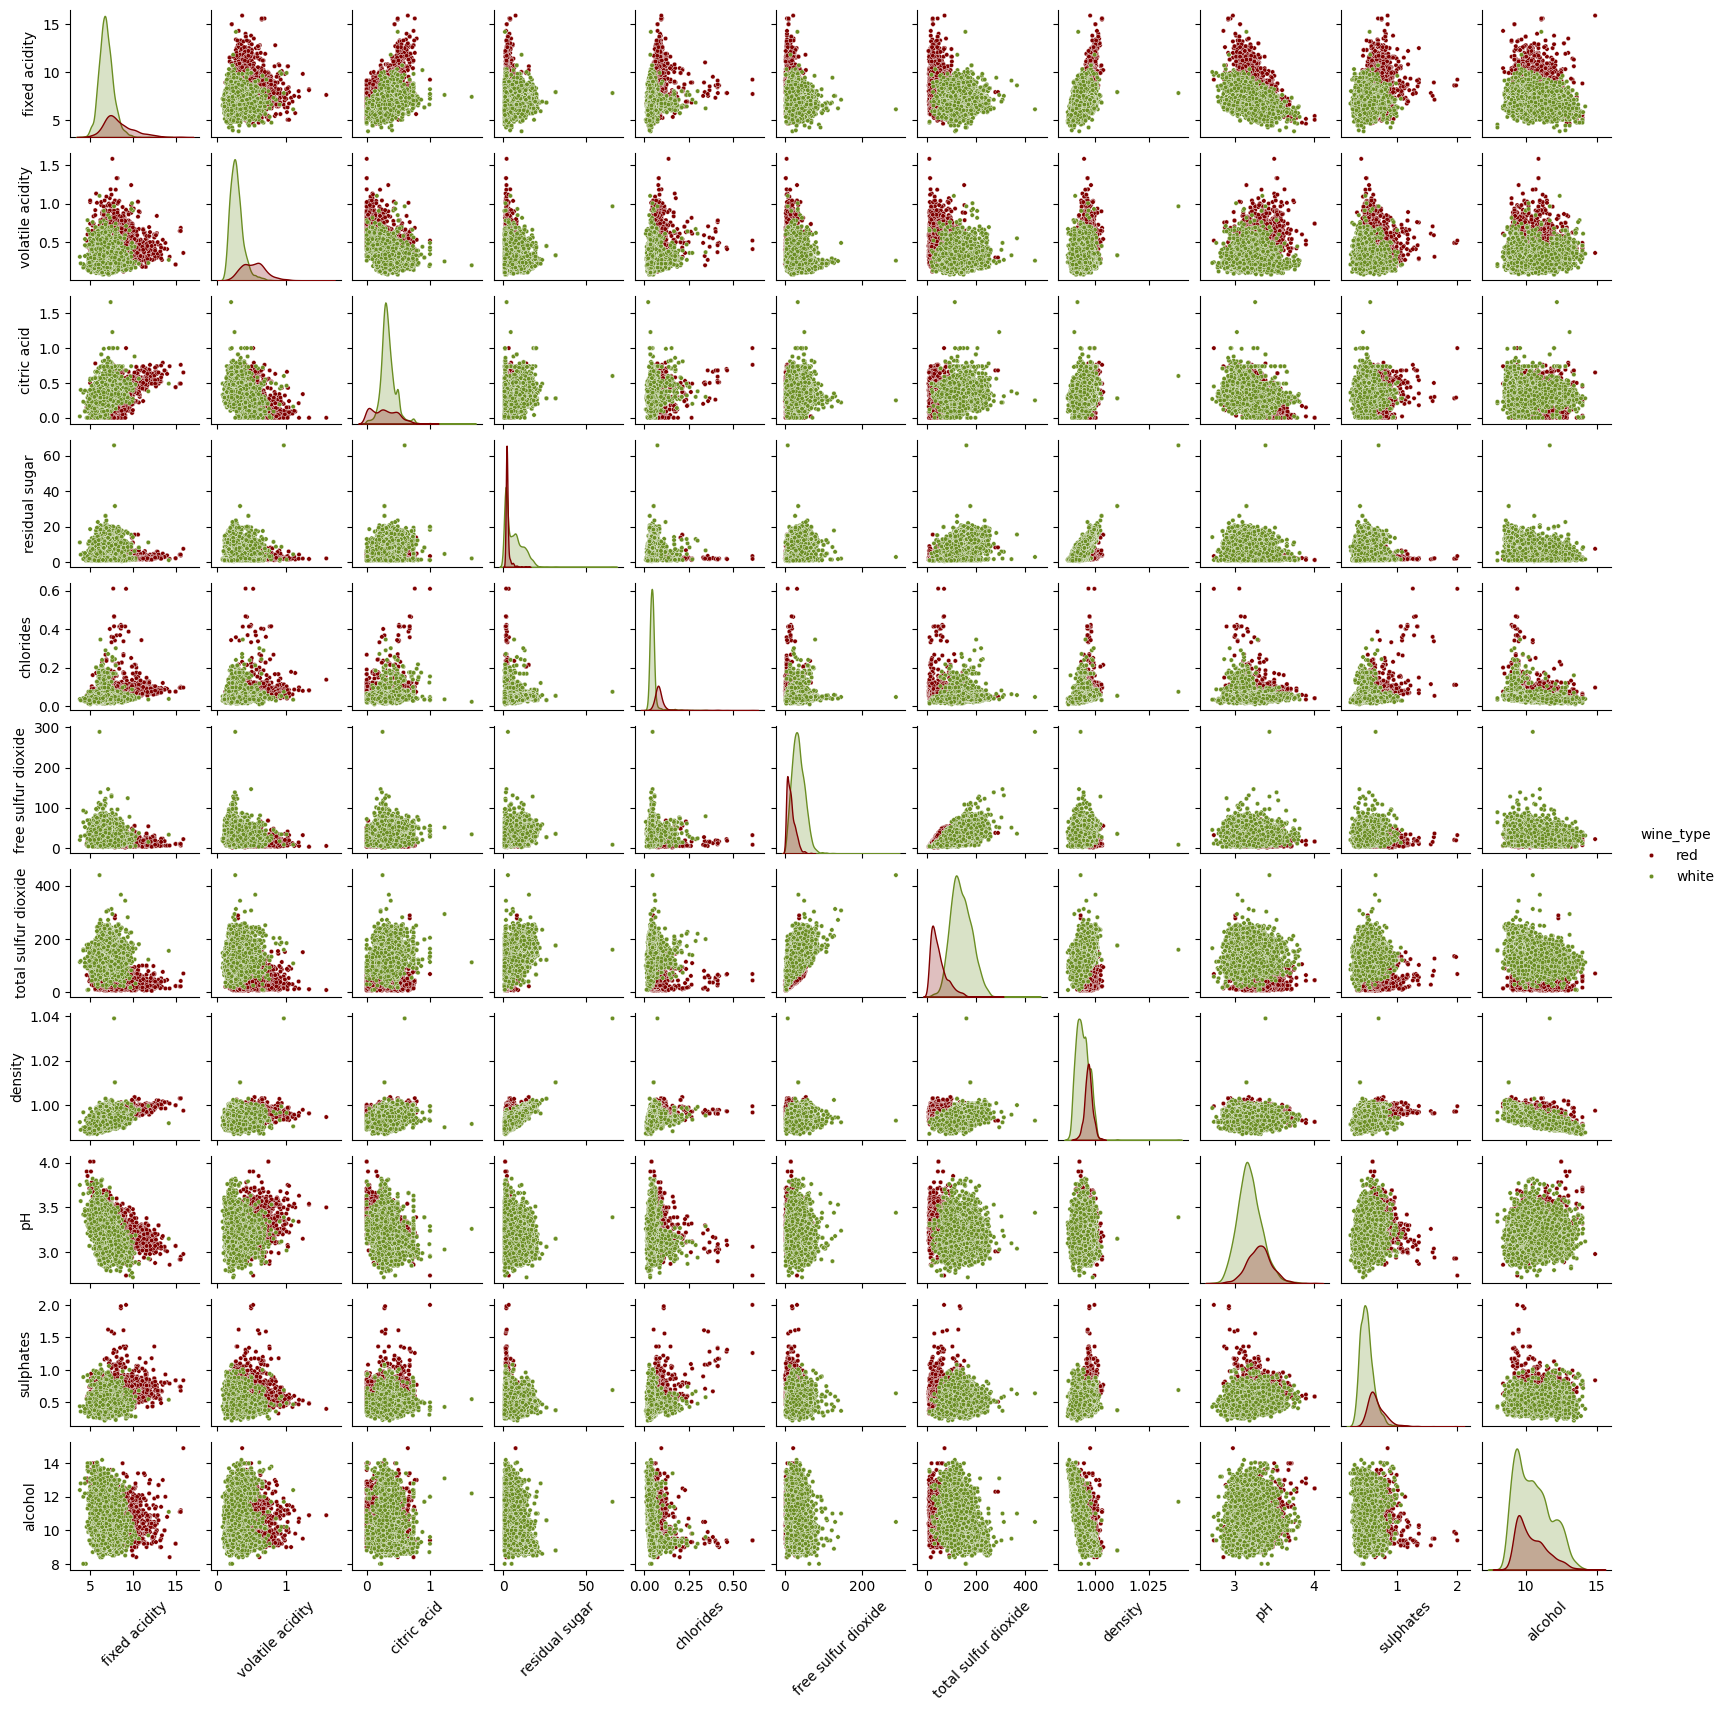

In [4]:
plt.figure(figsize=(10,10))
g = sns.pairplot(wine.drop(columns=["quality"]), 
             hue='wine_type', 
             height=1.5,
             palette={"red": "#800000", "white": "#6B8E23"},
             plot_kws={'s': 10})

for ax in g.axes[-1, :]:
    ax.set_xlabel(ax.get_xlabel(), rotation=45)

plt.show()

There are several feature-feature correlations that can be quickly compared using this plot. For example, it was observed that there is a stronger negative correlation between pH and fixed acidity of red wine than that of white wine. This can be due to differences in the acidic compounds present in red wine and white wine, respectively.

## Heatmap
Heatmap shows the Pearson correlation coefficients between two features. Using these maps, we can quickly detect strong and weak correlations, as well as the nature of the correlation (positive or negative).

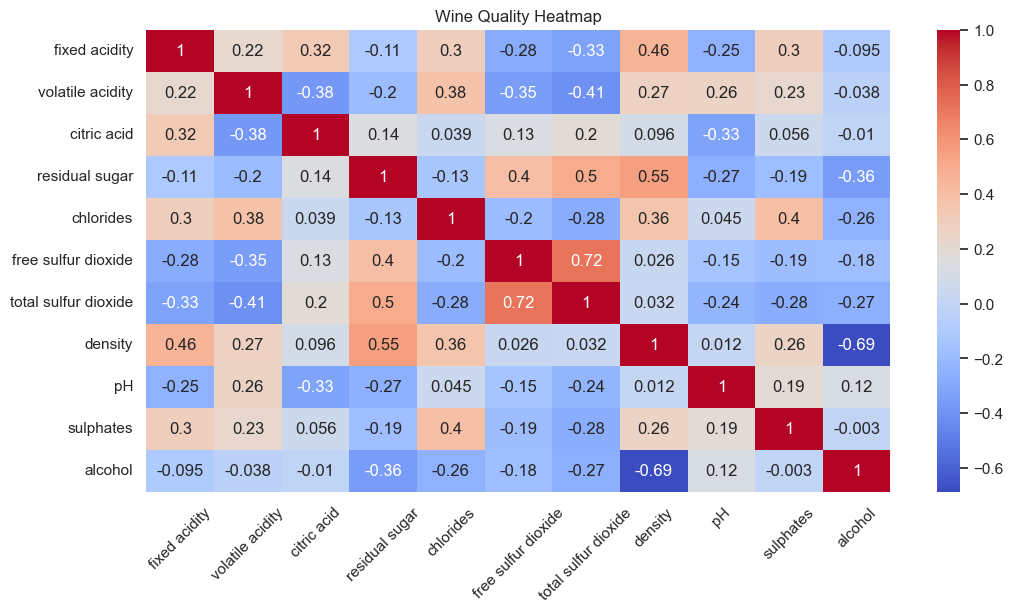

In [5]:
# Both red and white wine
plt.figure(figsize=(12,6))
sns.set_theme(style='whitegrid')
corr = wine.drop(columns=['quality', 'wine_type']).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.xticks(rotation=45)
plt.title("Wine Quality Heatmap")
plt.show()

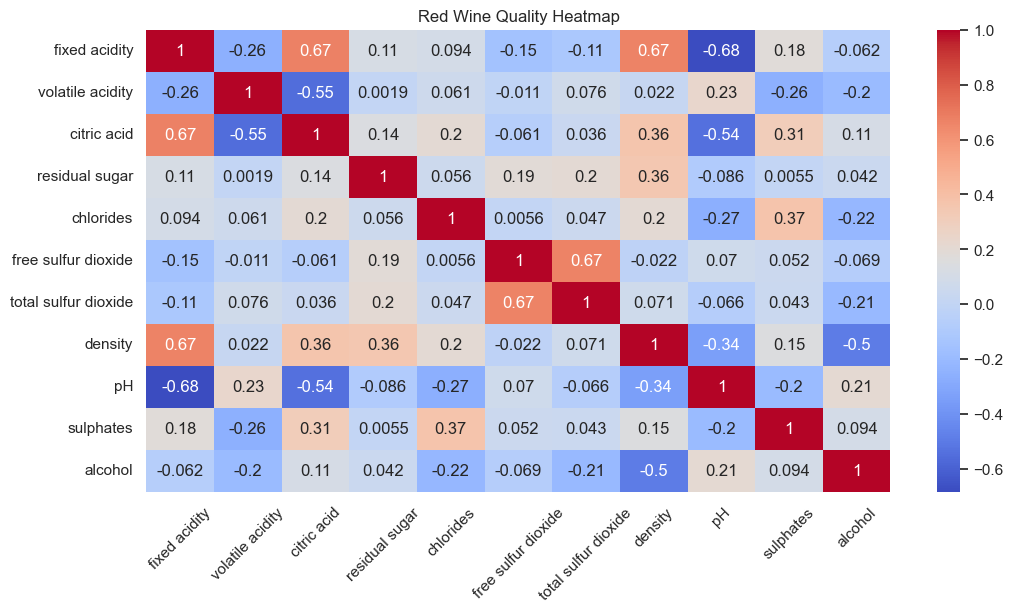

In [6]:
# Red wine
plt.figure(figsize=(12,6))
sns.set_theme(style='whitegrid')
corr = red_wine.drop(columns=['quality', 'wine_type']).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.xticks(rotation=45)
plt.title("Red Wine Quality Heatmap")
plt.show()

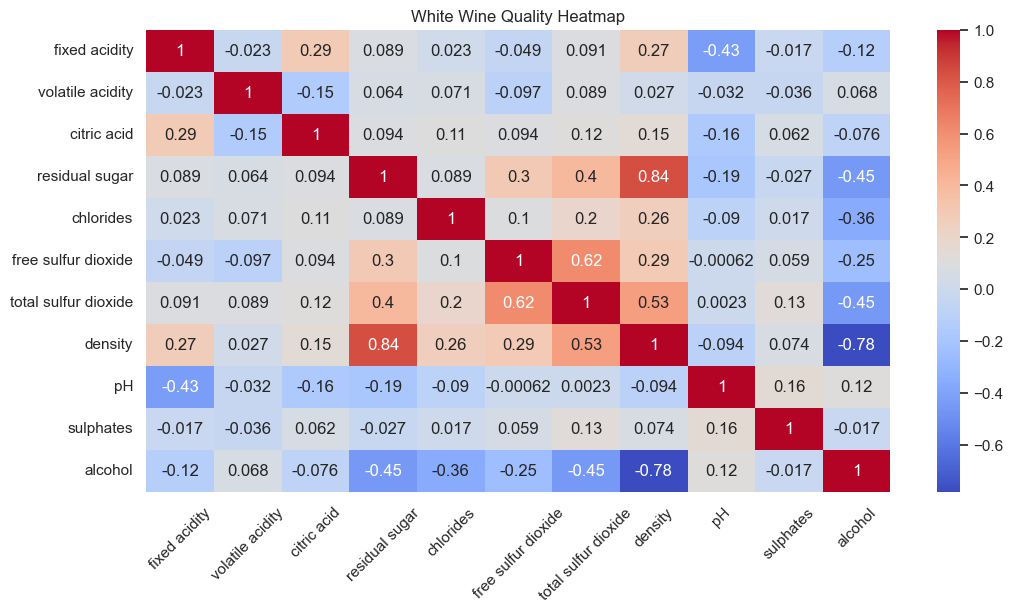

In [7]:
# White wine
plt.figure(figsize=(12,6))
sns.set_theme(style='whitegrid')
corr = white_wine.drop(columns=['quality', 'wine_type']).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.xticks(rotation=45)
plt.title("White Wine Quality Heatmap")
plt.show()

Using these heatmaps, we can also see that there is a stronger negative correlation of pH and fixed acidity in white wine than that of red wine.

## Distributions (Histogram and Count Plot)
I created histograms/count plots to visualize the distribution of each features and wine quality in the dataset.

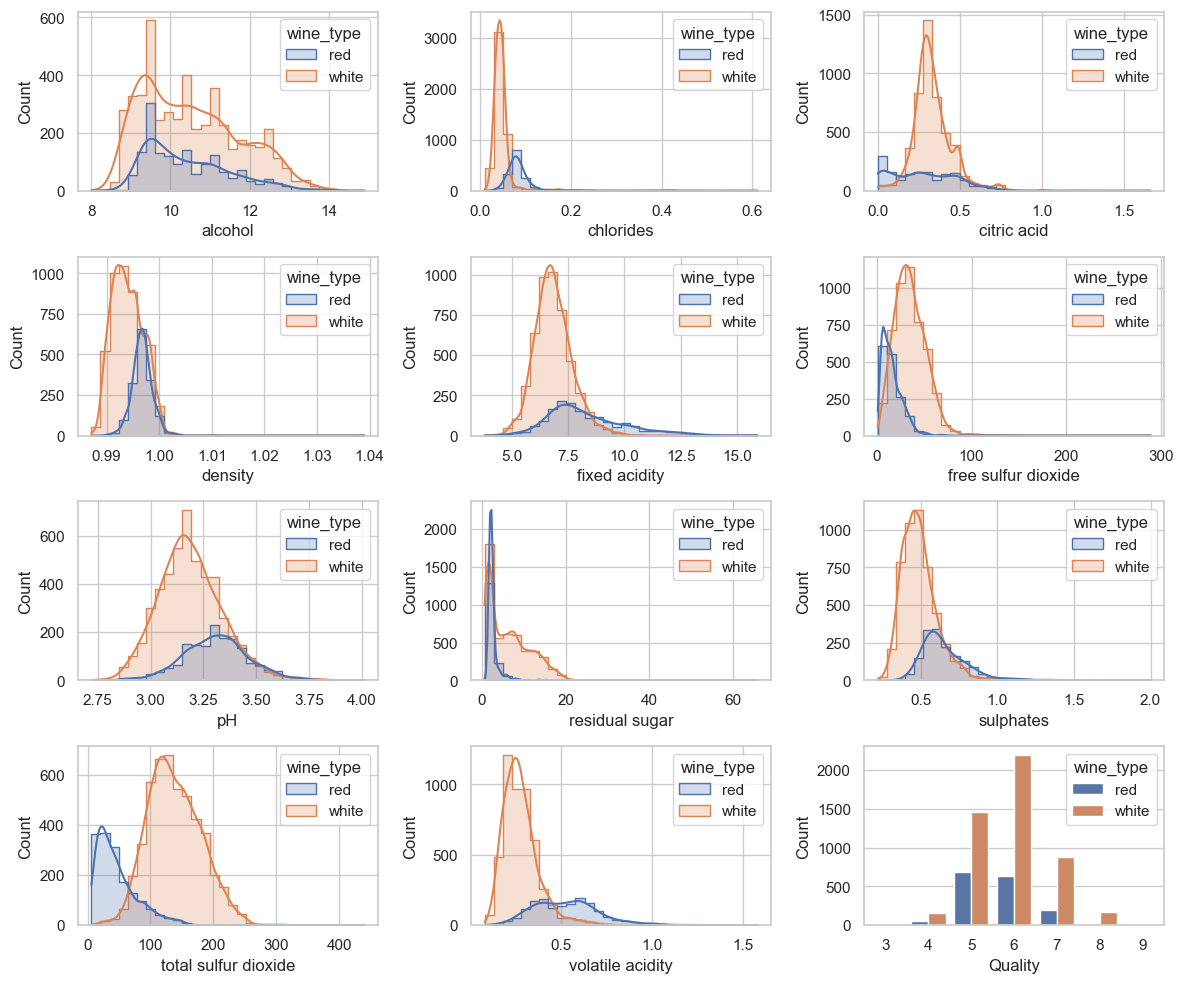

In [8]:
plt.figure(figsize=(12, 10))

# Create subplot for each feature
for i, feature in enumerate(feature_list, start=1):
    plt.subplot(4, 3, i)   # 4 rows, 3 cols
    sns.histplot(data=wine, x=feature, hue="wine_type", kde=True, bins=30, element="step")

plt.subplot(4, 3, 12)
sns.countplot(data=wine, x="quality", hue="wine_type")
plt.xlabel("Quality")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

With these histograms and count plots, we can see that red and white wines have features that differ in distributions. For example, white wines were found to have lower pH but lower fixed acidity than red wines. Also, the most frequent quality score of red wines is 5, but the most frequent quality score of white wines is 6.

## Distributions (Boxplot and Violin Plot)

Since the features in this dataset are of differing units and ranges, I decided to scale the features to see the inherent shape of the distribution of features. 

Normally, it is recommended to split the dataset first before scaling the features of training and test data. In this case, I scaled the original datasets for the purpose of exploratory data analysis only. I wanted to see the shape of distribution of each feature in the dataset.

In [9]:
scaler = StandardScaler()
features = wine.drop(columns=['quality', 'wine_type'])
scaled_features = scaler.fit_transform(features)

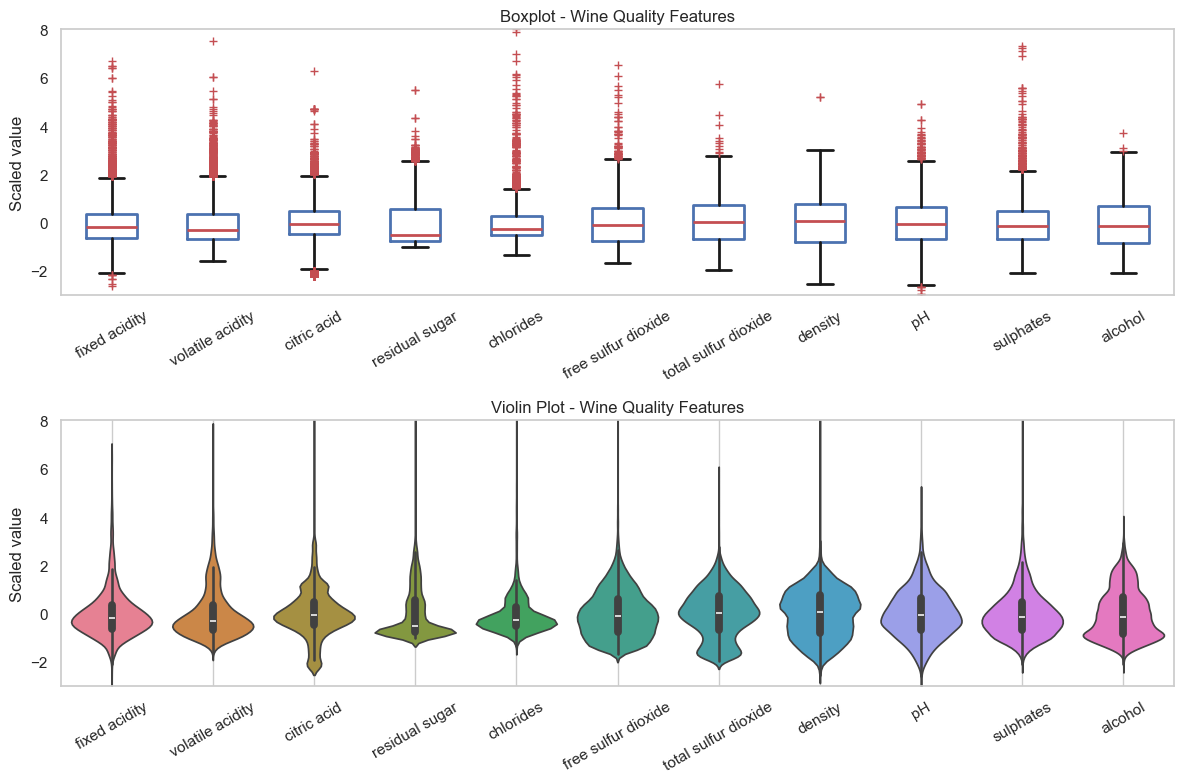

In [10]:
plt.figure(figsize=(12,8))
angle=30

# Matplotlib Boxplot
plt.subplot(211)
plt.boxplot(scaled_features, 
            boxprops=dict(linewidth=2, color='b'),
            medianprops=dict(linewidth=2, color='r'),
            whiskerprops=dict(linewidth=2, color='k'),
            capprops=dict(linewidth=2, color='k'),
            flierprops=dict(marker='+', markeredgecolor='r'))
plt.ylabel('Scaled value')
plt.ylim(-3, 8)
plt.title("Boxplot - Wine Quality Features")
plt.xticks(np.arange(11)+1,
           labels=features.columns.values,
           rotation=angle)
plt.grid()

# Seaborn Violin Plot
plt.subplot(212)
sns.violinplot(data=scaled_features)
plt.xticks(np.arange(11),
           labels=features.columns.values,
           rotation=angle)
plt.ylabel('Scaled value')
plt.ylim(-3, 8)
plt.title("Violin Plot - Wine Quality Features")
plt.grid()
plt.tight_layout()

Outliers in this dataset are mostly found on the upper region of the boxplot. This suggests that the distribution of majority of these features are positively-skewed.

Shown below are distributions of each feature (scaled) per wine type. These plots can be used to compare differences in feature distributions that can be associated to the type of wine.

Wine Quality Dataset with Scaled Features (for EDA only)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,red
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,red
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,red
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,red
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,red
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.783214,-0.787650,-0.197054,-0.807837,-0.486252,-0.367664,-0.420128,-1.186161,0.320319,-0.210144,0.593818,white
6493,-0.474652,-0.119460,0.284686,0.537425,-0.257883,1.491697,0.924588,0.067824,-0.426067,-0.478971,-0.747766,white
6494,-0.551792,-0.605417,-0.885253,-0.891916,-0.429160,-0.029599,-0.083949,-0.719251,-1.421248,-0.478971,-0.915464,white
6495,-1.323198,-0.301694,-0.128234,-0.912936,-0.971538,-0.593041,-0.101642,-2.003251,0.755710,-1.016626,1.935402,white


,Wine Type,Features,Scaled Values
0,red,fixed acidity,0.142473
1,red,fixed acidity,0.451036
2,red,fixed acidity,0.451036
3,red,fixed acidity,3.073817
4,red,fixed acidity,0.142473
...,...,...,...
71462,white,alcohol,0.593818
71463,white,alcohol,-0.747766
71464,white,alcohol,-0.915464
71465,white,alcohol,1.935402


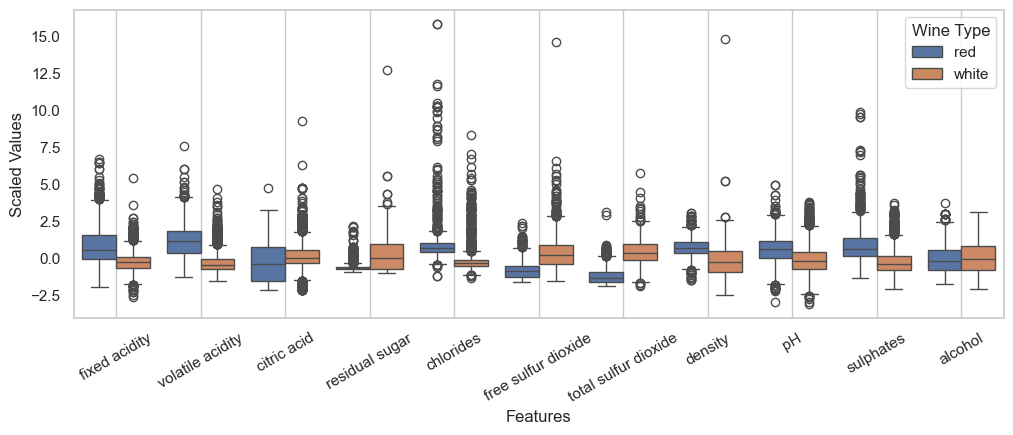

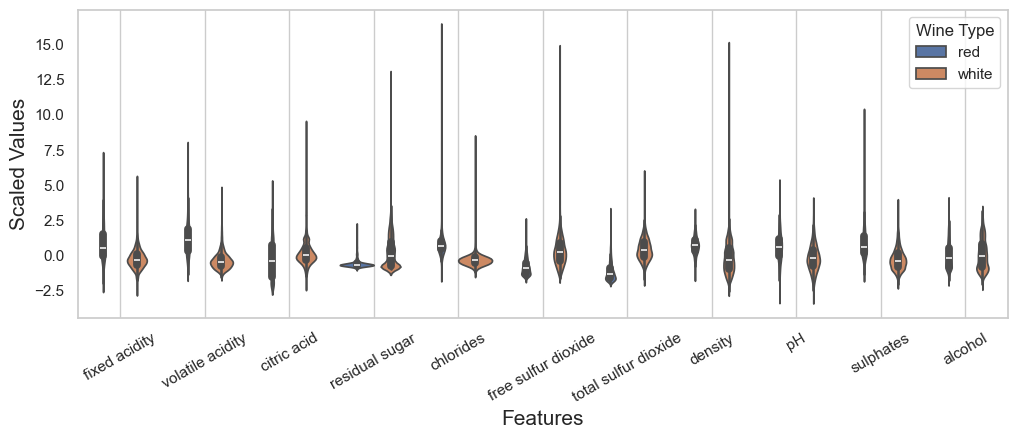

In [11]:
# Create a dataframe with scaled features (for EDA purposes only)
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)
wine_scaled_df = pd.concat([scaled_features_df, wine.iloc[:, [12]]], axis=1)
print('Wine Quality Dataset with Scaled Features (for EDA only)')
display(wine_scaled_df)

# Melt the dataframe
melted_wine = pd.melt(wine_scaled_df, id_vars=["wine_type"], value_vars=features.columns.values)
melted_wine.columns = ['Wine Type', 'Features', 'Scaled Values']
display(melted_wine)

# Create Boxplot
plt.figure(figsize=(12,4))
sns.boxplot(data=melted_wine, width=0.8,
            x="Features", y="Scaled Values", hue='Wine Type')
plt.rc('axes', labelsize=15)
plt.xticks(rotation=angle)
plt.grid()
plt.show()

# Create Violin Plot
plt.figure(figsize=(12,4))
sns.violinplot(data=melted_wine, width=0.8,
            x="Features", y="Scaled Values", hue='Wine Type')
plt.rc('axes', labelsize=15)
plt.xticks(rotation=angle)
plt.grid()
plt.show()

We can also see in these plots that white wines have lower pH but lower fixed acidity than red wines.